In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtest import backtest  
from SentimentFactorD import SentimentFactorD as sf

In [2]:
result = pd.read_csv('/home/afan/emotion_analysis/data/processed_data/results_v3.csv')

In [5]:
result

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2,pnl_rank,sp_rank
0,szzs,174182.052658,NaN,False,0,False,0,1380.0,NaN
1,szzs,0.000000,NaN,True,1,True,2,803.0,NaN
2,szzs,-231489.276991,-7.532819,True,1,True,3,371.0,63.0
3,szzs,-47604.288373,-1.539050,True,1,True,4,631.0,326.0
4,szzs,-151664.365027,-7.154322,True,1,True,5,560.0,67.0
...,...,...,...,...,...,...,...,...,...
1800,zzwb,82625.387930,4.166413,False,2,False,0,973.0,1003.0
1801,zzwb,-54542.767000,-1.748312,False,3,False,0,627.0,260.0
1802,zzwb,-137590.174470,-3.589601,False,4,False,0,568.0,135.0
1803,zzwb,-121375.902150,-2.349559,False,5,False,0,579.0,190.0


In [3]:
result['pnl_rank'] = result['cum_pnl'].rank(method='max')
result['sp_rank'] = result['sp_1y'].rank(method='max')

In [6]:
result_zs = result[result['index']=='szzs']
result_sz = result[result['index']=='szcz']
result_cy = result[result['index']=='cybz']
result_hs = result[result['index']=='hssb']
result_zz = result[result['index']=='zzwb']

In [7]:
result_zs.sort_values('cum_pnl',inplace=False)

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2,pnl_rank,sp_rank
117,szzs,-440863.615431,-27.996323,True,5,True,2,58.0,1.0
297,szzs,-380940.232093,-22.958757,False,5,True,2,87.0,10.0
326,szzs,-375935.722555,-23.184577,False,6,True,2,98.0,8.0
146,szzs,-368175.791404,-22.890256,True,6,True,2,121.0,11.0
268,szzs,-350985.071627,-18.262025,False,4,True,2,140.0,21.0
...,...,...,...,...,...,...,...,...,...
25,szzs,246442.916475,9.456242,True,1,True,26,1564.0,1315.0
85,szzs,255417.143680,7.664787,True,3,True,28,1587.0,1277.0
180,szzs,257548.410871,6.320376,True,6,False,0,1590.0,1220.0
252,szzs,260006.232301,7.182146,False,3,True,15,1594.0,1251.0


In [8]:
result_sz.sort_values('cum_pnl',inplace=False)

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2,pnl_rank,sp_rank
478,szcz,-510843.729827,-25.426652,True,5,True,2,19.0,3.0
424,szcz,-470788.125212,NaN,True,3,True,6,36.0,NaN
482,szcz,-470788.125212,NaN,True,5,True,6,36.0,NaN
632,szcz,-470788.125212,NaN,False,4,True,5,36.0,NaN
633,szcz,-470788.125212,NaN,False,4,True,6,36.0,NaN
...,...,...,...,...,...,...,...,...,...
426,szcz,411618.270670,6.611809,True,3,True,8,1769.0,1232.0
427,szcz,411618.270670,6.611809,True,3,True,9,1769.0,1232.0
446,szcz,443886.222997,8.257925,True,3,True,28,1791.0,1289.0
382,szcz,451560.254311,12.189126,True,1,True,22,1792.0,1334.0


In [9]:
result_cy.sort_values('cum_pnl',inplace=False)

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2,pnl_rank,sp_rank
933,cybz,-642201.024455,NaN,False,2,True,3,1.0,NaN
965,cybz,-627055.936421,NaN,False,3,True,6,14.0,NaN
814,cybz,-627055.936421,NaN,True,4,True,6,14.0,NaN
993,cybz,-627055.936421,NaN,False,4,True,5,14.0,NaN
994,cybz,-627055.936421,NaN,False,4,True,6,14.0,NaN
...,...,...,...,...,...,...,...,...,...
759,cybz,488510.822982,10.663542,True,2,True,9,1801.0,1330.0
787,cybz,516729.725669,6.637300,True,3,True,8,1803.0,1234.0
788,cybz,516729.725669,6.637300,True,3,True,9,1803.0,1234.0
807,cybz,517591.899155,7.694614,True,3,True,28,1804.0,1278.0


In [11]:
result_hs.sort_values('cum_pnl',inplace=False)

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2,pnl_rank,sp_rank
1200,hssb,-460351.78409,-25.344247,True,5,True,2,39.0,4.0
1380,hssb,-397710.16094,-20.801317,False,5,True,2,73.0,18.0
1409,hssb,-389127.99086,-21.426901,False,6,True,2,78.0,16.0
1229,hssb,-386278.96578,-21.538900,True,6,True,2,82.0,15.0
1351,hssb,-372617.06517,-16.987300,False,4,True,2,117.0,23.0
...,...,...,...,...,...,...,...,...,...
1335,hssb,345510.05321,7.334028,False,3,True,15,1725.0,1264.0
1110,hssb,358177.07878,10.657558,True,1,True,28,1730.0,1329.0
1109,hssb,358177.07878,10.657558,True,1,True,27,1730.0,1329.0
1108,hssb,358177.07878,10.657558,True,1,True,26,1730.0,1329.0


In [12]:
result_zz.sort_values('cum_pnl',inplace=False)

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2,pnl_rank,sp_rank
1561,zzwb,-498047.03436,-26.311384,True,5,True,2,20.0,2.0
1506,zzwb,-451864.71517,NaN,True,3,True,5,53.0,NaN
1686,zzwb,-451864.71517,NaN,False,3,True,5,53.0,NaN
1774,zzwb,-451864.71517,NaN,False,6,True,6,53.0,NaN
1715,zzwb,-451864.71517,NaN,False,4,True,5,53.0,NaN
...,...,...,...,...,...,...,...,...,...
1465,zzwb,344538.62134,11.386254,True,1,True,22,1723.0,1332.0
1700,zzwb,362873.17475,7.540726,False,3,True,19,1736.0,1274.0
1697,zzwb,362873.17475,7.540726,False,3,True,16,1736.0,1274.0
1529,zzwb,408942.21477,8.947565,True,3,True,28,1762.0,1306.0


In [13]:
positions = sf(length_1 = 3, weighted = True, rolling = True, length_2 = 15).get_sentiment_factor()

# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='cybz')  #szzs/szcz/cybz

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# sharpe ratio
sr_1d = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()


print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))

377034.71058199974; 4.516815355058194


In [14]:
# 多头
ps = []
for i in range(len(positions)):
    ps.append(1)
fack_positions = pd.DataFrame(ps, index=positions.index, columns=['position'])
fack_positions

,position
date,
2020-02-03,1
2020-02-04,1
2020-02-05,1
2020-02-06,1
2020-02-07,1
...,...
2020-07-21,1
2020-07-22,1
2020-07-23,1


In [16]:
# Return df of results with changeing length_1 and stock type
# Debug
def get_results(w = True, r = True, len2 = 12):
    print('Weighted = ' + str(w) +'; rolling = ' + str(r) + '; len_r = ' + str(len2))
    test_list = ['szzs','szcz','cybz']
    cols = list(range(1,7))
    cum_lists = []
    sp_lists = []
    for i in range(7):
        if i == 0:
            positions = fack_positions
        else:
            positions = sf(length_1 = i, weighted = w, rolling = r, length_2 = len2).get_sentiment_factor()
            if len(positions.position.unique())== 1:
                print('Warnning: When len_1 = ' + str(i) + ', there is only '+ str(positions.position.unique()) + ' in positions.') 
        list_cum = []
        list_sp = []
        for j in test_list:
            backtester = backtest(positions, index=j)  #szzs/szcz/cybz
            # day-to-day pnl, cumsum pnl
            dtd_pnl, cum_pnl = backtester.get_pnl()
            cum = cum_pnl.iloc[-1].cum_pnl
            # sharpe ratio
            sr_1d = backtester.get_sharpe_ratio_1d()
            sr_1y = backtester.get_sharpe_ratio_1y()

            list_cum.append(cum)
            list_sp.append(sr_1y)
        cum_lists.append(list_cum)
        sp_lists.append(list_sp)
    df_cum = pd.DataFrame(np.array(cum_lists), columns=test_list)
    df_sp = pd.DataFrame(np.array(sp_lists), columns=test_list)
    return df_cum, df_sp

           

# Visualization

In [17]:
def get_return(index_df, positions):
    # net_return = return - 0.003 open_price
    test_price = index_df.loc[positions.index,:]
    price_return = test_price.diff(1)
    price_return.columns = ['return']
    net_return = pd.DataFrame(
        price_return[['return']].values-test_price[['open_price']].values*0.003,
        index = price_return.index, columns=['net_return']
    )

    return price_return, net_return


def get_index_df(index):
        # read szzs from file
        path = str(index)+'.csv'
        print (path)
        szzs_df = pd.read_csv(str(index)+'.csv', usecols=[0, 6], names=['date', 'open_price']).iloc[1:,:]
        szzs_df['date'] = pd.to_datetime(szzs_df['date'])
        szzs_df['open_price'] = szzs_df['open_price'].astype('float')
        szzs_df = szzs_df.set_index('date')
        szzs_df = szzs_df.sort_index(ascending=True)

        return szzs_df
    

def get_zs_df(index, positions):
    cp_df = get_index_df(index)
    rt_df, nr_df = get_return(cp_df, positions)
    zs_df = pd.merge(cp_df, rt_df, left_index=True, right_index=True)
    zs_df = pd.merge(zs_df, nr_df, left_index=True, right_index=True)
    zs_df = pd.merge(zs_df, positions, left_index=True, right_index=True)
    
    return zs_df




In [18]:
def get_check_df (zs_df):
    check_df = zs_df
    check_list = []
    for i in range(len(check_df)-1):
        row1 = check_df.iloc[i]
        row2 = check_df.iloc[i+1]
        n = row2.net_return
        p = row1.position
        if p*n >= 0:
            check_list.append(1)
        else:
            check_list.append(0)
    check_list.append(np.nan)
    check_df['check'] = check_list
    
    return check_df

In [19]:
def get_pic(index,positions):
    a = get_zs_df(index, positions)
    ck = get_check_df(a)

    c_0 = ck[ck.position==0]
    c_1 = ck[ck.position==1]
    c_1_r = c_1[c_1.check == 1]
    c_1_w = c_1[c_1.check == 0]
    c_2 = ck[ck.position==-1]
    c_2_r = c_2[c_2.check == 1]
    c_2_w = c_2[c_2.check == 0]

    plt.figure(figsize=(8, 8))
    plt.plot(ck.index, ck.open_price)
    plt.xlabel(u'Date')
    plt.ylabel(u'open_price')
    plt.title(str(index))
    plt.scatter(c_1_r.index, c_1_r.open_price, marker='o', c='g', label="Right_Buy")
    plt.scatter(c_1_w.index, c_1_w.open_price, marker='o', c='r', label = 'Wrong_Buy')
    plt.scatter(c_2_r.index, c_2_r.open_price, marker='s', c='g', label = 'Right_Sell')
    plt.scatter(c_2_w.index, c_2_w.open_price, marker='s', c='r', label = 'Wrong_Sell')
    plt.scatter(c_0.index, c_0.open_price, marker='x', label = 'No_Action')
    plt.legend(loc = "upper left")

    plt.show()

In [20]:
def get_pic_cum_pnl(index,cum_pnl, fack_cum):
    b = cum_pnl
    c = fack_cum

    plt.figure(figsize=(8, 8))
    plt.plot(b.index, b.cum_pnl)
    plt.plot(c.index, c.cum_pnl, c='r')
    plt.xlabel(u'Date')
    plt.ylabel(u'Cum_pnl')
    plt.title(str(index))
    plt.legend(loc = "upper left")

    plt.show()

In [21]:
def get_precision_rate(index, positions):
    zs_df = get_zs_df(index, positions)
    ck = get_check_df(zs_df)
    n = len(ck)-1
    rate_df = pd.DataFrame(ck.groupby(['position'])['check'].sum()/ck.groupby(['position'])['check'].count())
    count_df = pd.DataFrame(ck.groupby(['position'])['check'].count()/n)
    pc_df = pd.merge(rate_df, count_df, left_index=True, right_index=True)
    pc_df.columns=['group_accuracy','percentage_size']

    return  pc_df

# 沪深300

In [63]:
positions = sf(length_1 = 1, weighted = True, rolling = True, length_2 = 22).get_sentiment_factor()

# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='hssb')  #szzs/szcz/cybz/hssb/zzwb

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# sharpe ratio
sr_1d = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()

# #other details
# positions = sf(length_1 = 2, weighted = False, rolling = True, length_2 = 12).get_sentiment_factor()

# # Create backtest class, index to be changed with different index
# backtester = backtest(positions, index='cybz')  #szzs/szcz/cybz

# # Get data and result from backtest class

# # index data
# index_data = backtester.get_index_data()

# # open price
# _, open_price = backtester.get_prices()

# # price return
# # price_return = backtester.get_price_return()

# # day-to-day pnl, cumsum pnl
# dtd_pnl, cum_pnl = backtester.get_pnl()

# # day-tp-day return,cum return
# dtd_ret, cum_ret = backtester.get_return()

# # sharpe ratio
# sr_1d = backtester.get_sharpe_ratio_period()
# sr_1y = backtester.get_sharpe_ratio_1y()

# #details
net_df, tot_df, amount_df, cum_amount_df = backtester.get_net_amount()

print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))

402734.39216000144; 12.366011386319675


In [64]:
pos = list(positions.position)
new_pos = []
last_status = 0
for i in range (len(pos)):
    if pos[i] != 0 and pos[i] != last_status:
        last_status = pos[i]
        new_pos.append(last_status)        
    else:
        new_pos.append(0)
positions_real = pd.DataFrame(new_pos,index=positions.index,columns=['position'])

000300.csv


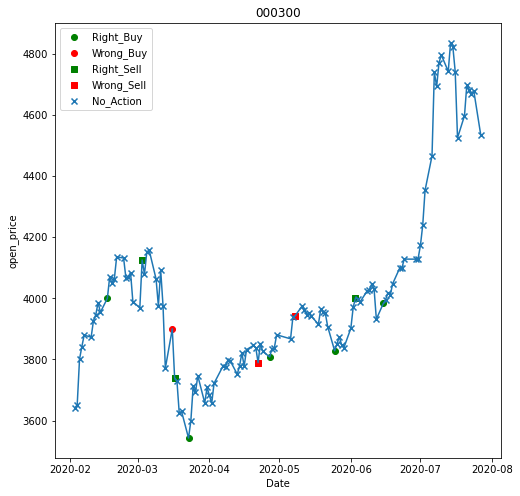

In [65]:
get_pic('000300',positions_real)

In [67]:
backtester_f = backtest(fack_positions, index='hssb')
f_ret, f_cum = backtester_f.get_pnl()

No handles with labels found to put in legend.


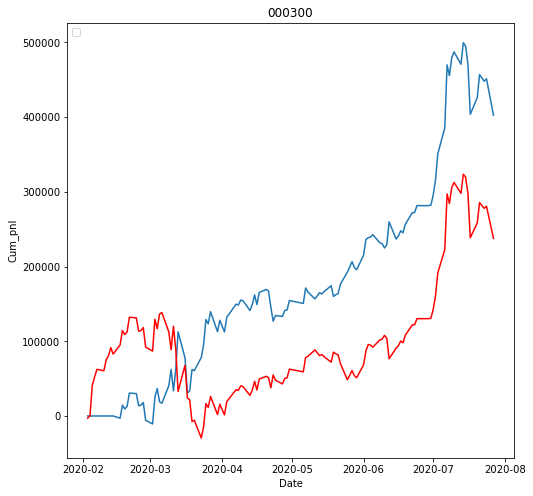

In [69]:
get_pic_cum_pnl('000300',cum_pnl,f_cum)

# 中证500

In [70]:
positions = sf(length_1 = 3, weighted = False, rolling = True, length_2 = 15).get_sentiment_factor()

# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='zzwb')  #szzs/szcz/cybz/hssb/zzwb

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# sharpe ratio
sr_1d = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()

# #other details
# positions = sf(length_1 = 2, weighted = False, rolling = True, length_2 = 12).get_sentiment_factor()

# # Create backtest class, index to be changed with different index
# backtester = backtest(positions, index='cybz')  #szzs/szcz/cybz

# # Get data and result from backtest class

# # index data
# index_data = backtester.get_index_data()

# # open price
# _, open_price = backtester.get_prices()

# # price return
# # price_return = backtester.get_price_return()

# # day-to-day pnl, cumsum pnl
# dtd_pnl, cum_pnl = backtester.get_pnl()

# # day-tp-day return,cum return
# dtd_ret, cum_ret = backtester.get_return()

# # sharpe ratio
# sr_1d = backtester.get_sharpe_ratio_period()
# sr_1y = backtester.get_sharpe_ratio_1y()

# #details
net_df, tot_df, amount_df, cum_amount_df = backtester.get_net_amount()

print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))

409906.8444500002; 9.306703602668279


In [71]:
backtester_f = backtest(fack_positions, index='zzwb')
#net_df, tot_df, amount_df, cum_amount_df = backtester_f.get_net_amount()
f_ret, f_cum = backtester_f.get_pnl()

In [73]:
pos = list(positions.position)
new_pos = []
last_status = 0
for i in range (len(pos)):
    if pos[i] != 0 and pos[i] != last_status:
        last_status = pos[i]
        new_pos.append(last_status)        
    else:
        new_pos.append(0)
positions_real = pd.DataFrame(new_pos,index=positions.index,columns=['position'])

000905.csv


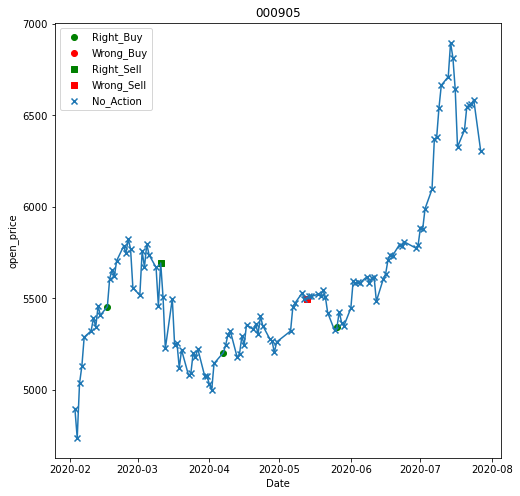

In [74]:
get_pic('000905',positions_real)

No handles with labels found to put in legend.


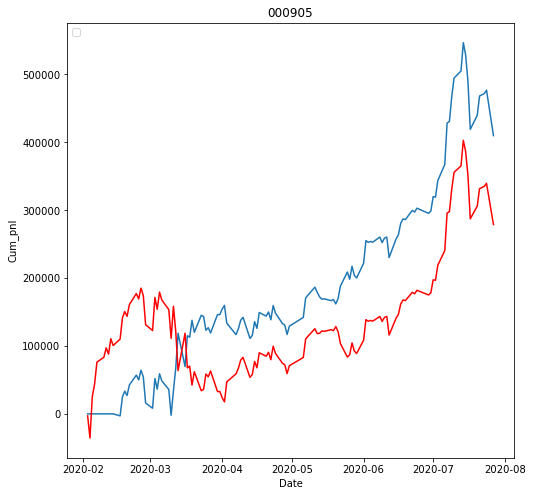

In [75]:
get_pic_cum_pnl('000905',cum_pnl,f_cum)

# CYBZ

In [24]:
positions = sf(length_1 = 3, weighted = False, rolling = True, length_2 = 15).get_sentiment_factor()

# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='cybz')  #szzs/szcz/cybz

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# sharpe ratio
sr_1d = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()

# #other details
# positions = sf(length_1 = 2, weighted = False, rolling = True, length_2 = 12).get_sentiment_factor()

# # Create backtest class, index to be changed with different index
# backtester = backtest(positions, index='cybz')  #szzs/szcz/cybz

# # Get data and result from backtest class

# # index data
# index_data = backtester.get_index_data()

# # open price
# _, open_price = backtester.get_prices()

# # price return
# # price_return = backtester.get_price_return()

# # day-to-day pnl, cumsum pnl
# dtd_pnl, cum_pnl = backtester.get_pnl()

# # day-tp-day return,cum return
# dtd_ret, cum_ret = backtester.get_return()

# # sharpe ratio
# sr_1d = backtester.get_sharpe_ratio_period()
# sr_1y = backtester.get_sharpe_ratio_1y()

# #details
net_df, tot_df, amount_df, cum_amount_df = backtester.get_net_amount()


print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))

566330.7027488998; -21.82796494787858


In [26]:
backtester_f = backtest(fack_positions, index='cybz')

f_ret, f_cum = backtester_f.get_pnl()

In [27]:
pos = list(positions.position)
new_pos = []
last_status = 0
for i in range (len(pos)):
    if pos[i] != 0 and pos[i] != last_status:
        last_status = pos[i]
        new_pos.append(last_status)        
    else:
        new_pos.append(0)
positions_real = pd.DataFrame(new_pos,index=positions.index,columns=['position'])

399006.csv


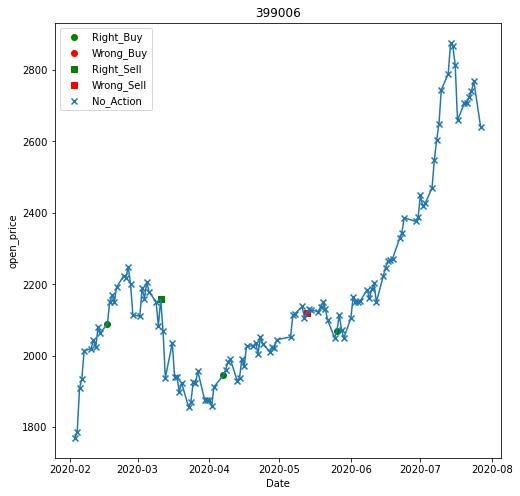

In [28]:
get_pic(399006,positions_real)

No handles with labels found to put in legend.


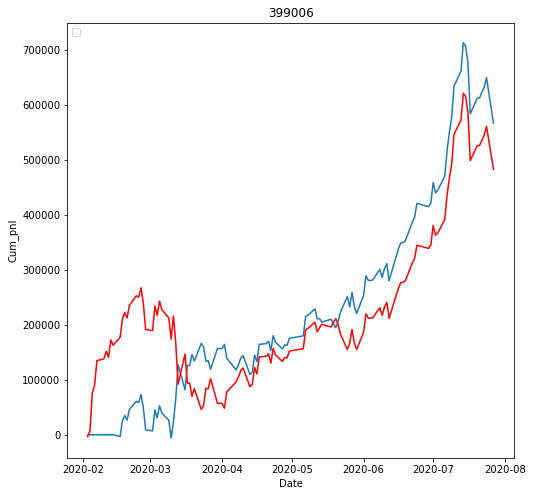

In [29]:
get_pic_cum_pnl(399006,cum_pnl,f_cum)

In [30]:
get_precision_rate('399006',positions_real)

399006.csv


,group_accuracy,percentage_size
position,,
-1,0.5,0.016807
0,1.0,0.957983
1,1.0,0.025210


# SZCZ

In [32]:
positions = sf(length_1 = 3, weighted = False, rolling = True, length_2 = 15).get_sentiment_factor()

# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='szcz')  #szzs/szcz/cybz

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# sharpe ratio
sr_1d = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()


print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))

484829.0825962003; -24.605712366502274


In [33]:
backtester_f = backtest(fack_positions, index='szcz')

f_ret, f_cum = backtester_f.get_pnl()

In [34]:
pos = list(positions.position)
new_pos = []
last_status = 0
for i in range (len(pos)):
    if pos[i] != 0 and pos[i] != last_status:
        last_status = pos[i]
        new_pos.append(last_status)        
    else:
        new_pos.append(0)
positions_real = pd.DataFrame(new_pos,index=positions.index,columns=['position'])

399001.csv


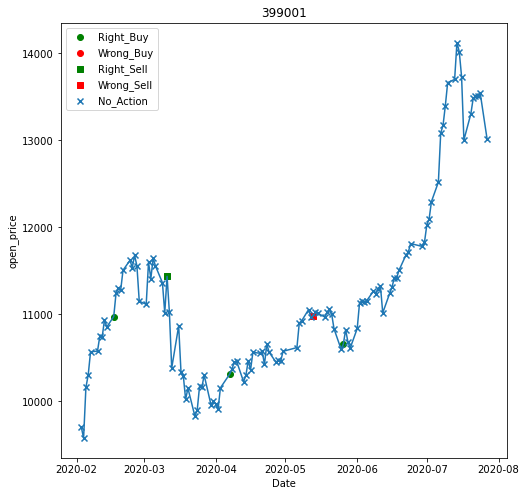

In [35]:
get_pic(399001,positions_real)

No handles with labels found to put in legend.


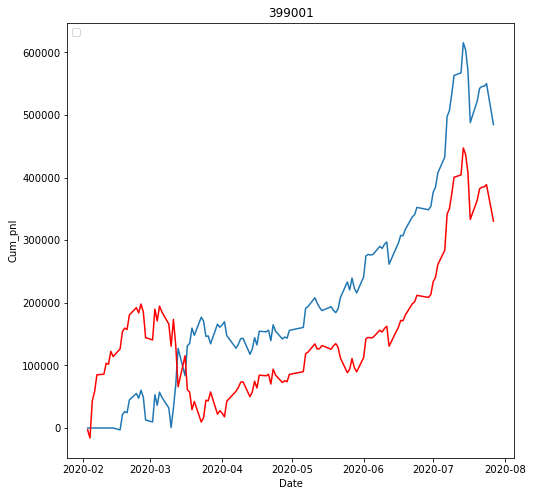

In [36]:
get_pic_cum_pnl(399001,cum_pnl,f_cum)

In [37]:
get_precision_rate('399001',positions_real)

399001.csv


,group_accuracy,percentage_size
position,,
-1,0.5,0.016807
0,1.0,0.957983
1,1.0,0.025210


# SZZH

In [39]:
positions = sf(length_1 = 1, weighted = True, rolling = True, length_2 = 22).get_sentiment_factor()

# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='szzs')  #szzs/szcz/cybz

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# net
net_df, tot_df, amount_df, cum_amount_df = backtester.get_net_amount()

# sharpe ratio
sr_1d = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()


print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))

289921.0519420011; -30.43258655295025


In [40]:
backtester_f = backtest(fack_positions, index='szzs')

f_ret, f_cum = backtester_f.get_pnl()

In [41]:
pos = list(positions.position)
new_pos = []
last_status = 0
for i in range (len(pos)):
    if pos[i] != 0 and pos[i] != last_status:
        last_status = pos[i]
        new_pos.append(last_status)        
    else:
        new_pos.append(0)
positions_real = pd.DataFrame(new_pos,index=positions.index,columns=['position'])

399001.csv


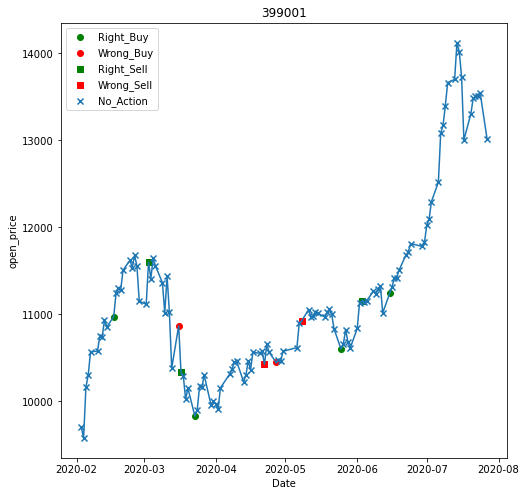

In [42]:
get_pic(399001,positions_real)

In [43]:
get_precision_rate('000001',positions_real)

000001.csv


,group_accuracy,percentage_size
position,,
-1,0.6,0.042017
0,1.0,0.907563
1,0.5,0.050420


No handles with labels found to put in legend.


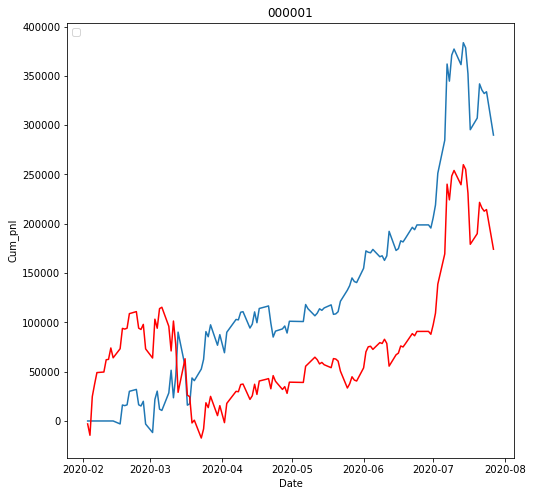

In [44]:
get_pic_cum_pnl('000001',cum_pnl,f_cum)